#Linear Regression

In [1]:
pip install scikit-learn pandas numpy seaborn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 802.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -------------------------------------- 167.0/167.0 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.0 MB 17.5 MB/s eta 0:00:01
   -- ------------------------------------- 0.7/11.0 MB 9.2 MB/s eta 0:00:02Note: you may need to restart the kernel to use updated packages.

   --- ------------------------------------ 0.9/11.0 MB 7.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/11.0 MB 6.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/11.0 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 5.5 MB/s eta 0:00:02
   ------ -------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [7]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
df['Price'] = housing.target

In [14]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

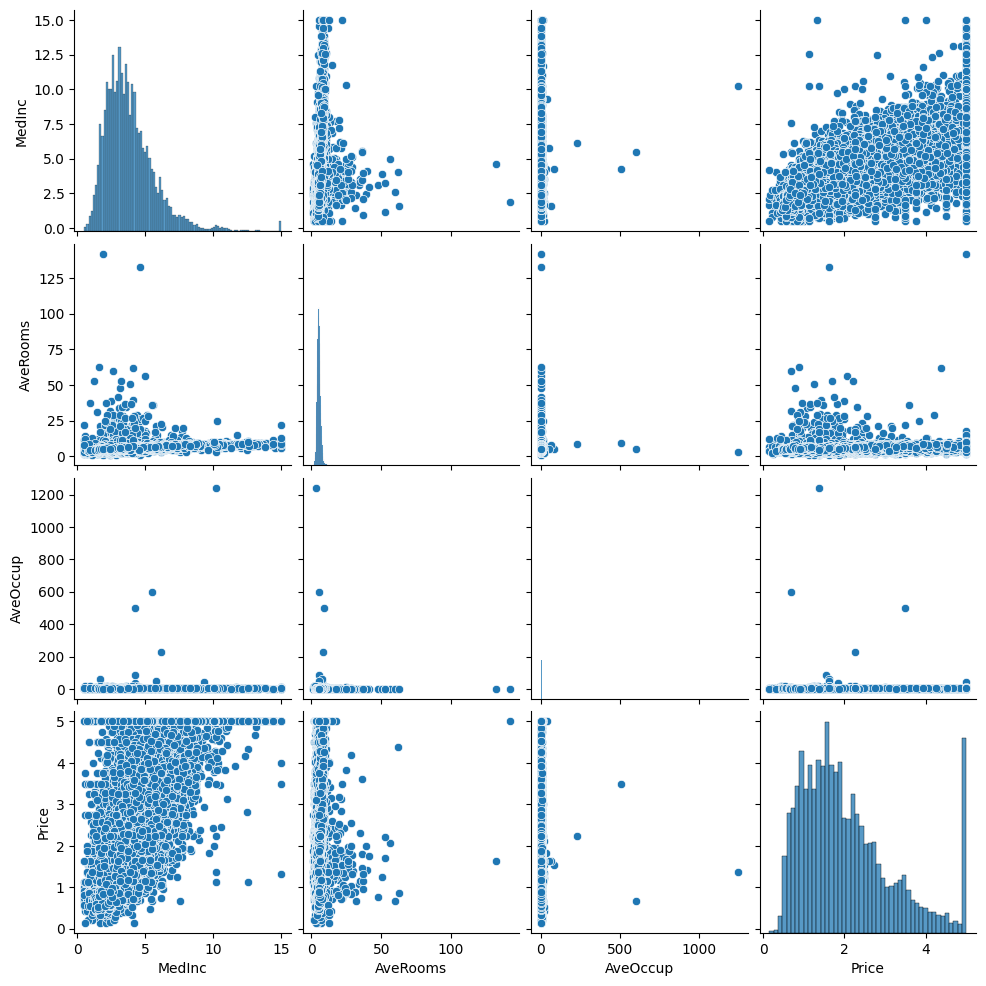

In [20]:
# Pairplot to visualize relationships between key variables
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'Price']])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
# Select features and the target variable
X = df[['MedInc', 'AveRooms']]  # Use two features for simplicity
y = df['Price']  # Target variable (house prices)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# View the coefficients (slopes) and intercept
print("Coefficients (slopes):", model.coef_)
print("Intercept:", model.intercept_)

Coefficients (slopes): [ 0.43626089 -0.04017161]
Intercept: 0.5972677793933256


In [25]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Compare the actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

        Actual  Predicted
20046  0.47700   1.162302
3024   0.45800   1.499135
15663  5.00001   1.955731
20484  2.18600   2.852755
9814   2.78000   2.001677


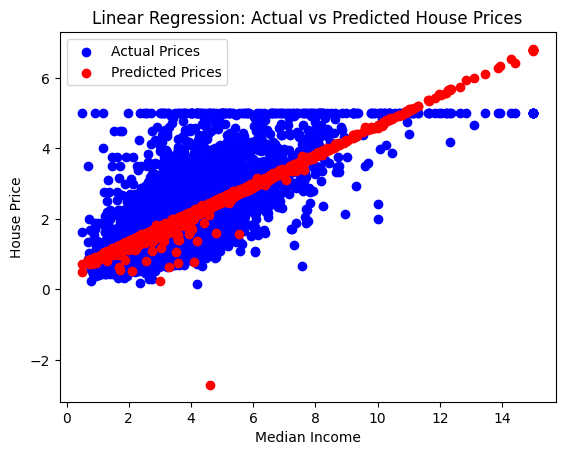

In [26]:
plt.scatter(X_test['MedInc'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['MedInc'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.7021550469058006
R-squared: 0.4641710652437856
